In [1]:
from os import listdir, path, makedirs
from matplotlib import pyplot as plt
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from shutil import copyfile
import seaborn as sns

In [2]:
data_dir = 'data'

In [3]:
folder_names = [f for f in listdir(data_dir)]

In [4]:
len(folder_names)

102

In [5]:
count_img = 0
for folder in folder_names:
    imgs = [img for img in listdir(path.join(data_dir, folder))]
    count_img += len(imgs)
    print(folder, len(imgs))
    
print('Total images', count_img)

accordion 55
airplanes 800
anchor 42
ant 42
BACKGROUND_Google 467
barrel 47
bass 54
beaver 46
binocular 33
bonsai 128
brain 98
brontosaurus 43
buddha 85
butterfly 91
camera 50
cannon 43
car_side 123
ceiling_fan 47
cellphone 59
chair 62
chandelier 107
cougar_body 47
cougar_face 69
crab 73
crayfish 70
crocodile 50
crocodile_head 51
cup 57
dalmatian 67
dollar_bill 52
dolphin 65
dragonfly 68
electric_guitar 75
elephant 64
emu 53
euphonium 64
ewer 85
Faces 435
Faces_easy 435
ferry 67
flamingo 67
flamingo_head 45
garfield 34
gerenuk 34
gramophone 51
grand_piano 99
hawksbill 100
headphone 42
hedgehog 54
helicopter 88
ibis 80
inline_skate 31
joshua_tree 64
kangaroo 86
ketch 114
lamp 61
laptop 81
Leopards 200
llama 78
lobster 41
lotus 66
mandolin 43
mayfly 40
menorah 87
metronome 32
minaret 76
Motorbikes 798
nautilus 55
octopus 35
okapi 39
pagoda 47
panda 38
pigeon 45
pizza 53
platypus 34
pyramid 57
revolver 82
rhino 59
rooster 49
saxophone 40
schooner 63
scissors 39
scorpion 84
sea_horse 57
sn

(300, 223, 3)


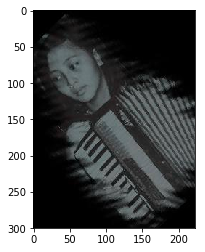

(225, 300, 3)


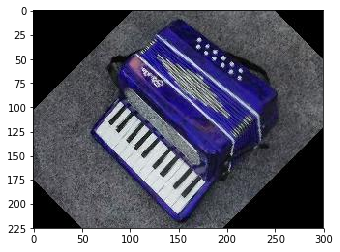

In [7]:
def inspect_img(folder_name, img):
    image = cv2.imread(path.join(data_dir, folder_name, img))
    print(image.shape)
    plt.imshow(image)
    plt.show()

inspect_img(folder_names[0], 'image_0005.jpg')
inspect_img(folder_names[0], 'image_0010.jpg')
#image = cv2.resize(image, (100, 100))
#print(image.shape)

In [8]:
df = pd.DataFrame()
for folder in folder_names:
    folder_path = path.join(data_dir, folder)
    imgs = pd.DataFrame([[img, folder, cv2.imread(folder_path+'/'+img).shape] for img in listdir(folder_path) if img != 'Thumbs.db'])
    df = pd.concat([df, imgs], axis=0)
df.columns = ['img', 'category', 'img_shape']
df = df.reset_index(drop=True)

In [9]:
df.shape

(9144, 3)

In [10]:
df['img_shape_x'] = df.img_shape.apply(lambda x: x[0])
df['img_shape_y'] = df.img_shape.apply(lambda x: x[1])
df['img_shape_z'] = df.img_shape.apply(lambda x: x[2])

In [11]:
df.head()

,img,category,img_shape,img_shape_x,img_shape_y,img_shape_z
0,image_0001.jpg,accordion,"(300, 260, 3)",300,260,3
1,image_0002.jpg,accordion,"(300, 232, 3)",300,232,3
2,image_0003.jpg,accordion,"(282, 300, 3)",282,300,3
3,image_0004.jpg,accordion,"(199, 300, 3)",199,300,3
4,image_0005.jpg,accordion,"(300, 223, 3)",300,223,3


In [12]:
df[['img_shape_x','img_shape_y','img_shape_z']].describe()

,img_shape_x,img_shape_y,img_shape_z
count,9144.000000,9144.000000,9144.0
mean,244.655731,301.666885,3.0
std,93.860972,96.887902,0.0
min,92.000000,80.000000,3.0
25%,186.000000,261.000000,3.0
50%,240.000000,300.000000,3.0
75%,300.000000,300.000000,3.0
max,3999.000000,3481.000000,3.0


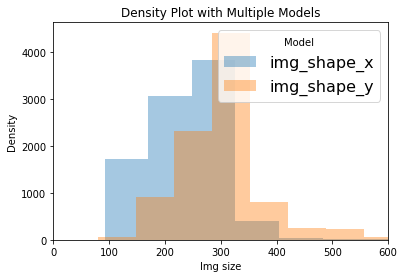

In [33]:
# Draw the density plot
img_shape = df[['img_shape_x','img_shape_y']]
for col in img_shape.columns:
    plot = sns.distplot(img_shape[col], hist = True, kde = False,
            hist_kws = {'linewidth': 3},
            label = col)
# Plot formatting
plt.xlim(0,600)
plt.legend(prop={'size': 16}, title = 'Model')
plt.title('Density Plot with Multiple Models')
plt.xlabel('Img size')
plt.ylabel('Density')

plt.show()


In [ ]:
df[['category']].describe()

In [229]:
x_train, x_testval, y_train, y_testval = train_test_split(
    df.img , df.category, test_size=0.30, random_state=42, stratify=df.category)

In [230]:
x_val, x_test, y_val, y_test = train_test_split(
    x_testval , y_testval, test_size=0.30, random_state=42, stratify=y_testval)

In [231]:
x_train.size, x_val.size, x_test.size

(6401, 1920, 824)

In [237]:
data_split = 'data_split'
if not path.exists(data_split):
    makedirs(data_split)
for split in ['train', 'val', 'test']:
    path_split = path.join(data_split, split)
    if not path.exists(path_split):
        makedirs(path_split)
    for folder in folder_names:
        if not path.exists(path.join(path_split, folder)):
            makedirs(path.join(path_split, folder))

In [234]:
a=df.iloc[x_train.index,:].apply(lambda row: 
            copyfile(path.join(data_dir, row.category, row.img), path.join(data_split, 'train', row.category, row.img)), axis=1)

In [238]:
a=df.iloc[x_val.index,:].apply(lambda row: 
            copyfile(path.join(data_dir, row.category, row.img), path.join(data_split, 'val', row.category, row.img)), axis=1)

In [239]:
a=df.iloc[x_test.index,:].apply(lambda row: 
            copyfile(path.join(data_dir, row.category, row.img), path.join(data_split, 'test', row.category, row.img)), axis=1)